# Corona Modell - Kontaktbeschränkungen
## Grundlage SIR Modell

Das [SIR Modell](https://de.wikipedia.org/wiki/SIR-Modell) teilt alle Menschen in gesunde ($S$), kranke ($I$) und genesene ($R$) ein. Dabei gelten folgende Gleichungen für die Änderungsrate der einzelnen Werte, wobei $\beta$ für die Infektionsrate und $\gamma$ für die Genesungsrate steht:

\begin{align}
    \frac{dS}{dt} &= - \beta \cdot \frac{SI}{N} \\
    \frac{dI}{dt} &= \beta \cdot \frac{SI}{N} - \gamma \cdot I \\
    \frac{dR}{dt} &= \gamma \cdot I
\end{align}

Erklärung: 
* $\frac{I}{N}$ ist der Anteil der Infizierten an der Gesamtbevölkerung. Je höher dieser ist, desto höher ist das Infektionsrisiko für die Gesunden. Dieses steigt auch mit der Infektionsrate $\gamma$. Der Faktor $\frac{\beta I}{N}$ lässt sich also als Infektionsrisiko bzw. Wahrscheinlichkeit verstehen. Multipliziert mit der Anzahl der gesunden Menschen erhält man dann den Erwartungswert der Neuinfektionen $\beta \cdot \frac{SI}{N}$. Dies ist die Anzahl der Menschen, die die Gruppe der Gesunden verlassen und die der Infizierten betritt.

* $\gamma \cdot I$ gibt an, wie viele infizierte Menschen wieder genesen und aus $I$ in $R$ kommen.

# Hybrid Modell

Um Kontaktbeschränkungen zu simulieren, sollte man zunächst Kontakte simulieren. Daher verwendet das Modell Menschen, die sich in Gruppen treffen können. Dann können sich nur die Personen innerhalb einer Gruppe untereinander anstecken:

## Simulation der Gruppen mit einzelnen Personen

Für die einzelnen Gruppen lässt sich das SIR-Modell anwenden. Werden einzelne Menschen simuliert, dürfen aber nur natürliche Zahlen verwendet werden, da sich dann nicht z.B. 2.45 Menschen in einer Gruppe infizieren können (Der dritte ist entweder infiziert oder nicht!).

Um dieses Problem zu lösen, wird (deterministischer pseudo-) Zufall verwendet. Dafür wird die Wahrscheinlichkeit für eine Infektion auf $\beta \cdot \frac{I}{N}$ gesetzt. Wird dieses Zufallsexperiment dann $S$ mal ausgeführt, erhalten wir einen Erwartungswert, der mit $\beta \cdot \frac{SI}{N}$ der gewünschten Formel entspricht.

## Simulation mit SIR-Modell

Personen, die sich nicht an die Beschränkungen halten, werden alle gemeinsam in einem SIR Modell behandelt. Somit wird, falls sich niemand an die Beschränkungen hält, einfach das normale SIR-Modell verwendet. Dadurch lässt sich der Effekt von Kontaktbeschränkungen im Vergleich besser zeigen.

## Zweiter Durchlauf des SIR-Modells

Damit sich auch Personen die sich nicht an die Kontaktbeschränkungen halten, welche anstecken können, die sich an diese halten und umgekehrt, wird das SIR-Modell ein zweites Mal für alle Personen ausgeführt. Für die Personen, die einzeln simuliert werden, wird wieder Zufall verwendet.

Dabei sollte die Infektionsrate hier aber geringer gewählt werden, damit der Effekt der Kontaktbeschränkungen dadurch nicht überschrieben wird.

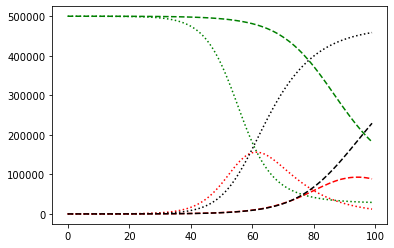

In [15]:
from hybrid_main import *

# Anzahl an Simulationsschritten
SIMULATIONS_DAUER = 100

# Anzahl an Personen insgesamt
personen = 1_000_000
# Anzahl an Personen, die sich an die Kontaktbeschränkungen halten
befolgend = 500_000
# Anzahl an Personen, die zu Beginn infiziert sind
infiziert = 20
# Anzahl an Personen, die zu Beginn bereits genesen sind
genesen = 0
# maximale Gruppengröße, die erlaubt ist
erlaubteGruppen = 4
# Rate, mit der infizierte Personen gesunde infizieren
infektionsRate = 0.3
# Rate, mit der infizierte genesen
genesungsRate = 0.1
# Raten für den zweiten SIR Durchlauf. Kann auf 0 gesetzt werden, um diesen wirkungslos zu machen
beta2 = 0
gamma2 = 0

# Welche Kurven sollen gezeigt werden
zeige_gesamt = False
zeige_befolgend = True
zeige_nichtbefolgend = True

simuliere(personen, befolgend, infiziert, genesen, erlaubteGruppen, infektionsRate, genesungsRate, beta2, gamma2, SIMULATIONS_DAUER,
          zeige_gesamt, zeige_befolgend, zeige_nichtbefolgend)

## Effekt der Kontaktbeschränkungen

Zunächst nehmen wir an, dass alle Infizierten gleichmäßig auf die Gruppen verteilt werden.
Die Zahl der Neuinfektionen beträgt dann in jeder Gruppe $\beta \cdot \frac{SI}{N}$. Rechnen wir das auf alle Gruppen hoch, erhalten wir dasselbe Ergebnis wie beim SIR Modell!

Nun soll die Anzahl der Infizierten in einer Gruppe mit der Zahl der Neuinfektionen $i$ in dieser in den Zusammenhang gebracht werden. Dafür werden die Genesenen nicht berücksichtigt, da die Rechnung so einfacher wird. Da der Faktor $\frac{\beta}{N}$ konstant ist, kann er ignoriert werden:

\begin{align}
    S \cdot I = (N - I) \cdot I = NI - I^2
\end{align}

Nun überlegen wir uns, was passiert, wenn wiraus einer Gruppe mit $I$ Infizierten einen mit einem Gesunden aus einer Gruppe mit $J$ infizierten tauschen. Dann haben wir $(I-1)$ Infizierte in der einen Gruppe und $(J+1)$ in der anderen. Betrachtet werden soll die Summe der Neuinfektionen $i$ aus beiden Gruppen:

\begin{align}
    i &= N(I - 1) - (I - 1)^2 + N(J + 1) - (J + 1)^2 \\
    &= NI - N - (I^2 - 2I + 1) + NJ + N - (J^2 + 2J + 1) \\
    &= NI + NJ - I^2 - J^2 + 2(I - J) - 2
\end{align}

Die Differenz zu den Neuinfektionen, die es sonst gegeben hätte ist $\Delta i$:
\begin{align}
    \Delta i &= (NI + NJ - I^2 - J^2 + 2(I - J) - 2) - (NI + NJ -I^2 -J^2) \\
    &= 2(I - J) - 2
\end{align}

Das Vorzeichen dieser Veränderung ist positiv, wenn gilt:
\begin{align}
    0 &< 2(I - J) - 2 \\
    2 &< 2(I - J) \\
    1 &< I - J \\
    J + 1 &< I
\end{align}

Tauschen wir einen Infizierten also zwischen zwei Gruppen, gibt es genau dann mehr Neuinfektionen, wenn es in der Gruppe, aus der die Person kommt mehr als einen Infizierten zusätzlich gibt. Somit ist das Maximum der Neuinfektionen genau dann erreicht, wenn alle Gruppen aus gleich vielen Infizierten bestehen, da ein Tausch, nach dem wir mehr Neuinfektionen haben dann nicht mehr möglich ist.

Andersherum ist der Wert genau dann minimal, wenn es nicht mehr möglich ist, einen Infizierten von einer Gruppe mit wenigen Infizierten in eine mit vielen zu verschieben. Es gibt also am wenigsten Neuinfektionen, wenn in möglichst vielen Gruppen nur Infizierte oder nur Gesunde sind.